задача 10


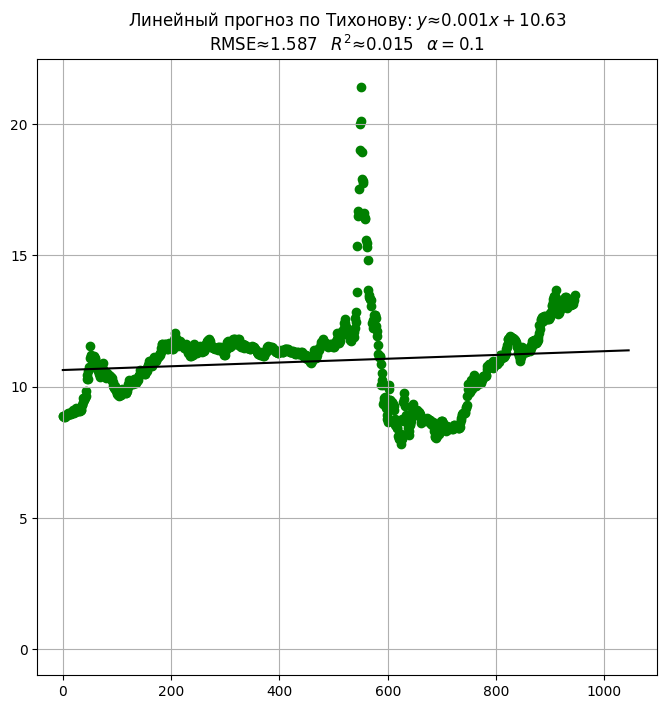

In [8]:
import numpy as np # библиотека расширенной математики
import matplotlib as mp # библиотека рисования растровых графиков
import sklearn as sk # библиотека методов машинного обучения
# создаём короткие псевдонимы
from matplotlib import pyplot as plt
from sklearn import linear_model as LM
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2s
X=[] # создаем пустой массив значений X
Y=[] # создаем пустой массив значений Y
data = open('CNYRUB_TOM5.csv') # открываем файл на чтение
i = 0 # счётчик элементов выборки
while True: # до тех пор пока файл не закончится
    line = data.readline() # считываем строку
    if not line: # если не удалось (закончился файл)
        data.close() # закрываем файл
        break # и прерываем цикл чтения
    else: # если удалось (файл ещё не закончился)
        Y.append([float(line)]) # добавляем значение функции в массив
        X.append([i]) # добавляем значение аргумента в массив
        i = i + 1 # подсчитываем объём выборки
n = np.size(Y) # определяем размер выборки
for i in range(n, n+100): # для следующих ста элементов
            X.append([i]) # добавляем значение аргумента в массив
reg = LM.Ridge(alpha=0.1) # задаём уровень значимости альфа
reg.fit(X[:n], Y ) # запускаем подбор коэффициенов методом ОПГ
R = reg.predict(X) # формируем прогноз по подобранным коэффициентам
a = np.round((reg.coef_[0][0]),3) # получаем коэффициент наклона
b = np.round((reg.intercept_[0]),3) # получаем высоту над осью OX
RMSE = np.round(mse(R[:n], Y)**0.5,3) # получаем среднеквадратичную ошибку
R2 = np.round(r2s(Y, R[:n]),3) # получаем коэффициент детерминации
# формируем строку подписи
t = 'Линейный прогноз по Тихонову:'+'$\;y≈$'+str(a)+'$x+'+str(b)+'$\n'
t = t + 'RMSE≈'+str(RMSE)+'$\;\;\;R^2≈$'+str(R2)+'$\;\;\;α=0.1$'
fig, ax = plt.subplots(figsize = (8, 8)) # график, размер в десятках процентов экрана
plt.rcParams["font.family"] = "Arial" # выбираем шрифт содержащий греки
ax.plot(R, c = 'k') # нарисовать зелёный график уравнения регрессии
ax.scatter(X[:n], Y, c ='g') # построить точки значений выборки синего цвета
ax.grid() # нарисовать координатную сетку
ax.set_title(t) # подписать заголовок графика
ax.set_xlim(0-int(n*0.05), int((n+100)*1.05)) # ограничить отображение по оси X (от; до)
ax.set_ylim(0-int(np.max(Y)*0.05), np.max(Y)*1.05) # отображение по оси Y (от; до)
plt.show() # показать, что получилось


задача 11


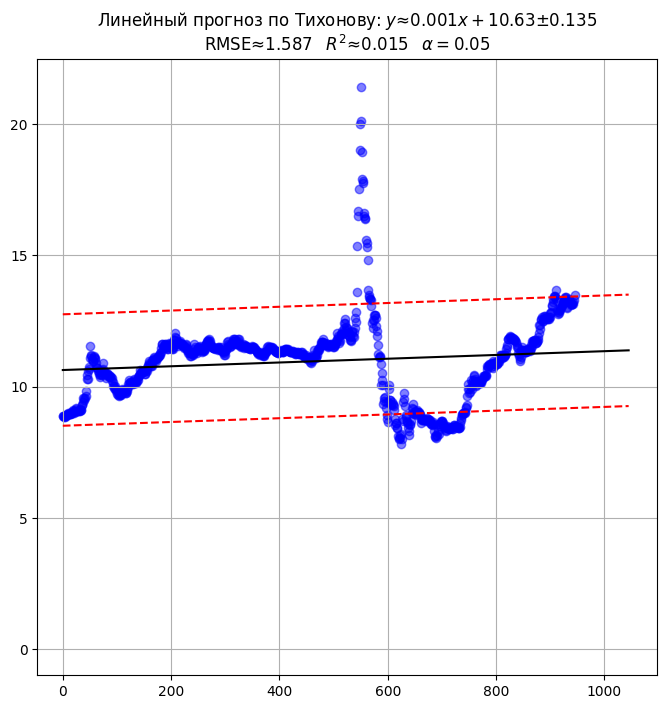

In [5]:
import numpy as np # библиотека расширенной математики
import matplotlib as mp # библиотека рисования растровых графиков
import sklearn as sk # библиотека методов машинного обучения
import scipy as sp # библиотека научных уравнений и констант
# создаём короткие псевдонимы
from matplotlib import pyplot as plt
from sklearn import linear_model as LM
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2s
fc=100 # задаём глубину прогноза (левая точка кросс-валидации)
al=0.05 # задаём уровень значимости альфа
X=[] # создаем пустой массив значений X
Y=[] # создаем пустой массив значений Y
data = open('CNYRUB_TOM5.csv') # открываем файл на чтение
i = 0 # счётчик элементов выборки
while True: # до тех пор пока файл не закончится
    line = data.readline() # считываем строку
    if not line: # если не удалось (закончился файл)
        data.close() # закрываем файл
        break # и прерываем цикл чтения
    else: # если удалось (файл ещё не закончился)
        Y.append([float(line)]) # добавляем значение функции в массив
        X.append([i]) # добавляем значение аргумента в массив
        i = i + 1 # подсчитываем объём выборки
n = np.size(Y) # определяем размер выборки
for i in range(n, n+fc): # для элементов прогноза
            X.append([i]) # добавляем значение аргумента в массив
reg = LM.Ridge(alpha=al) # передаём модели уровень значимости альфа
reg.fit(X[:n], Y ) # запускаем подбор коэффициенов методом ОПГ
R = reg.predict(X) # формируем прогноз по подобранным коэффициентам
a = np.round((reg.coef_[0][0]),3) # получаем коэффициент наклона
b = np.round((reg.intercept_[0]),3) # получаем высоту над осью OX
McvE = mse(R[:n], Y) # получаем средний квадрат ошибки
RMSE = np.round(mse(R[:n], Y)**0.5,3) # получаем стандартное отклонение
R2 = np.round(r2s(Y, R[:n]),3) # получаем коэффициент детерминации
# получаем t-множитель доверительного интервала
t=sp.stats.t.ppf(q=1-al/2,df=n-1) # для неизвестного распределения
# получаем z-множитель доверительного интервала
z=sp.stats.norm.ppf(q=al/2) # для нормального распределения
# выполняем кросс-валидацию слева
Lcv = LM.Ridge(alpha=al) # передаём модели уровень значимости альфа
Lcv.fit(X[fc:n], Y[fc:] ) # запускаем подбор коэффициенов методом ОПГ
LcvR = reg.predict(X) # формируем прогноз по подобранным коэффициентам
LcvE = mse(LcvR[:fc], Y[:fc]) # получаем средний квадрат ошибки
# выполняем кросс-валидацию справа
Rcv = LM.Ridge(alpha=al) # передаём модели уровень значимости альфа
Rcv.fit(X[:n-fc], Y[:n-fc] ) # запускаем подбор коэффициенов методом ОПГ
RcvR = reg.predict(X) # формируем прогноз по подобранным коэффициентам
RcvE = mse(LcvR[n-fc:n], Y[n-fc:n]) # получаем средний квадрат ошибки
fc = int(n/2)

# выполняем кросс-валидацию слева по центру
СLcv = LM.Ridge(alpha=al) # передаём модели уровень значимости альфа
СLcv.fit(X[fc:n], Y[fc:] ) # запускаем подбор коэффициенов методом ОПГ
СLcvR = reg.predict(X) # формируем прогноз по подобранным коэффициентам
СLcvE = mse(LcvR[:fc], Y[:fc]) # получаем средний квадрат ошибки
# выполняем кросс-валидацию справа по центру
СRcv = LM.Ridge(alpha=al) # передаём модели уровень значимости альфа
СRcv.fit(X[:n-fc], Y[:n-fc] ) # запускаем подбор коэффициенов методом ОПГ
СRcvR = reg.predict(X) # формируем прогноз по подобранным коэффициентам
СRcvE = mse(LcvR[n-fc:n], Y[n-fc:n]) # получаем средний квадрат ошибки
# вычисляем доверительный интервал
sigm = max(LcvE,McvE,RcvE,СRcvE)**0.5 # стандартное отклонение прогноза
conf = np.round(t*sigm/(n**0.5),3)
plt.rcParams["font.family"] = "Arial" # выбираем шрифт содержащий греки
# формируем строку подписи
t = 'Линейный прогноз по Тихонову:'+'$\;y≈$'+str(a)+'$x+'+str(b)+'±'+str(conf)
t = t +'$\n'+'RMSE≈'+str(RMSE)+'$\;\;\;R^2≈$'+str(R2)+'$\;\;\;α=$'+str(al)
fig, ax = plt.subplots(figsize = (8, 8)) # график, размер в десятках процентов экрана
ax.plot(R, c = 'k') # нарисовать график уравнения регрессии
ax.plot(R+sigm, c = 'r', linestyle ='--') # нарисовать границу прогноза сверху
ax.plot(R-sigm, c = 'r', linestyle ='--') # нарисовать границу прогноза снизу
ax.scatter(X[:n], Y, c ='b', alpha=0.5) # построить точки значений выборки синего цвета
ax.grid() # нарисовать координатную сетку
ax.set_title(t) # подписать заголовок графика
ax.set_xlim(0-int(n*0.05), int((n+100)*1.05)) # ограничить отображение по оси X (от; до)
ax.set_ylim(0-int(np.max(Y)*0.05), np.max(Y)*1.05) # отображение по оси Y (от; до)
plt.show() # показать, что получилось
